# Data Description


## Source:

    *Tiago A. Almeida (talmeida ufscar.br)
    *Department of Computer Science
    *Federal University of Sao Carlos (UFSCar)
    *Sorocaba, Sao Paulo - Brazil

    *JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
    *R&D Department Optenet
    *Las Rozas, Madrid - Spain


## Data Set Information:

    This corpus has been collected from free or free for research sources at the Internet:

    -> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
    
    -> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
    
    -> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
    
    -> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

    [1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

    [2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

    [3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


## Attribute Information:

    The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

    
    ham What you doing?how are you?
    
    ham Ok lar... Joking wif u oni...
    
    ham dun say so early hor... U c already then say...
    
    ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
    
    ham Siva is in hostel aha:-.
    
    ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
    
    spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
    
    spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
    
    spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

#### Note: the messages are not chronologically sorted.



In [1]:
#### For linear Algebra
import numpy as np
#### For Data manipulation
import pandas as pd
#### For Data visualization
import seaborn as se
import matplotlib.pyplot as mlt

In [2]:
import re
import nltk
import string as st

#### Loading the data in dataframe, as per data is space seprated we use "\t".

#### Nameing the column's as Labels contain(span,ham) and messenge contain(messages)

In [3]:
data = pd.read_csv("SMSSpamCollection",sep="\t",names=["Labels","messenge"],error_bad_lines=False)

#### Adding new column, contain lenth of text message
data["length_of_string"] = [len(i) for i in data["messenge"]]
data

,Labels,messenge,length_of_string
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [4]:
data["Labels"].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

## Observation:
    * there are 4825 messenge's as ham.
    * there are 747 messenge's as sham.

In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Labels,5572,2,ham,4825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
messenge,5572,5169,"Sorry, I'll call later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length_of_string,5572,NaN,NaN,NaN,80.4899,59.9429,2,36,62,122,910


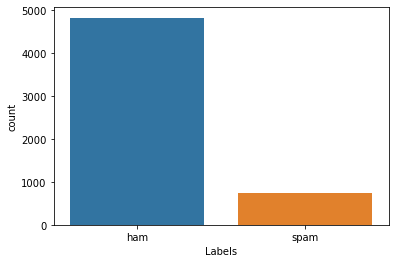

In [6]:
se.countplot(data["Labels"])
mlt.show()

## Observation:
    * messenge's have mostly in catagorie of "ham".
    * mean length of messenge's is 80.
    * max length of messenge's is 910.
    * most frequent messenge is "Sorry, I'll call later"(freq: 30).
    * out of 5572 their are 5169 messenge's are unique.

In [7]:
data.groupby('Labels').describe()

length_of_string                                                    \
                  count        mean        std   min    25%    50%    75%   
Labels                                                                      
ham              4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0   
spam              747.0  138.670683  28.873603  13.0  133.0  149.0  157.0   

               
          max  
Labels         
ham     910.0  
spam    223.0

## Observation:
    * ham has mean length of string 71.
    * spam has mean length of string 198.

* spam has less max length as ham.

In [8]:
#### Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

In [9]:
#### making dataframe only have spam data
df = data.loc[data['Labels']=='spam', :]
df

,Labels,messenge,length_of_string
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


In [10]:
#### removing spaces from a string
words = ' '.join(df['messenge'])
words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [11]:
#### removing trash from a string
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
cleaned_word

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [12]:
def cloud(d,l):
    """
    :param l: label for which woerd cloud to form.
    :param d: dataframe in which data is prsent.
    :return: form an wordcloud.
    """
    words = ''
    for msg in d[d['Labels']==l]['messenge']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width = 800, height = 500).generate(words)
    mlt.imshow(wordcloud)
    mlt.axis('off')
    mlt.show()

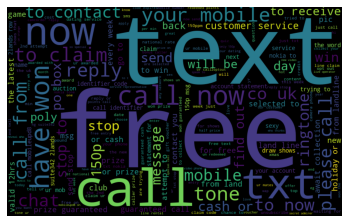

In [13]:
cloud(data,'spam')

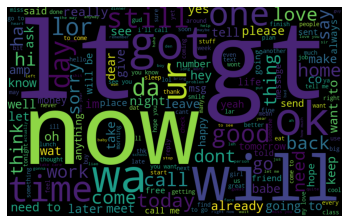

In [14]:
cloud(data,'ham')

# Preprocessing the data:
- Remove special characters
- Conversion to lowercase
- Tokenization
- Stemming or Lemmatization

In [15]:
def text_process(mess, flag):
    '''
    :param mess: raw string.
    :param flag: "stm" for stmming and "lm" for lemmatization.
    :return:
        1. remove punc.
        2. remove stop word.(convert lowercase).
        3. word_tokenize.
        4. stammering or Lemmatize.
        5. return lclean text.
    '''
    from nltk.corpus import wordnet
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    clean_msg_lst = []
    npunc = [p for p in mess if p not in st.punctuation]
    npunc = "".join(npunc)
    clean_mess = [word.lower() for word in npunc.split() if word.lower() not in stopwords.words("english")]
    token = [word_tokenize(word) for word in npunc.split()]
    token = [''.join(ele) for ele in token]
    if (flag == 'stem'):
        clean_mess = [stemmer.stem(word) for word in token]
    else:
        clean_mess = [lemmatizer.lemmatize(word) for word in token]

    clean_msg_lst.append(" ".join(clean_mess))
    return (clean_msg_lst[0])

In [16]:
print(text_process(data["messenge"][0],flag="stem"))

Go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat


In [17]:
%%time
data["stemmed_messenge"] = data['messenge'].apply(lambda x: text_process(x, 'stem'))

Wall time: 42.8 s


### Adding new column of stammed messages .

"Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."

In [18]:
data

,Labels,messenge,length_of_string,stemmed_messenge
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...
5568,ham,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...


### Adding new column of Lemmatize messages .

In [19]:
%%time
data["clean_messenge_lmt"] = data['messenge'].apply(lambda x: text_process(x,"lm"))

Wall time: 44.3 s


In [20]:
data

,Labels,messenge,length_of_string,stemmed_messenge,clean_messenge_lmt
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...,Nah I dont think he go to usf he life around h...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home,Will ü b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest,Pity wa in mood for that Soany other suggestion
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...,The guy did some bitching but I acted like id ...


### CountVectorizer:
    * Convert a collection of text documents to a matrix of token counts.
    
#### analyzer = word 
    * Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cov = CountVectorizer(analyzer="word")
X = cov.fit_transform(data["stemmed_messenge"])

In [22]:
print(cov.get_feature_names())

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '0870

### List of vectorized feature's.

In [23]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Array of vectorized data.

In [24]:
print(X)

  (0, 3338)	1
  (0, 7500)	1
  (0, 4132)	1
  (0, 5636)	1
  (0, 2249)	1
  (0, 1345)	1
  (0, 5294)	1
  (0, 3876)	1
  (0, 1754)	1
  (0, 3429)	1
  (0, 7931)	1
  (0, 4277)	1
  (0, 1752)	1
  (0, 2031)	1
  (0, 7133)	1
  (0, 3391)	1
  (0, 1151)	1
  (0, 7720)	1
  (1, 5259)	1
  (1, 4312)	1
  (1, 4098)	1
  (1, 7841)	1
  (1, 5291)	1
  (2, 3876)	1
  (2, 3150)	1
  :	:
  (5570, 7759)	1
  (5570, 1165)	1
  (5570, 3827)	1
  (5570, 4401)	1
  (5570, 6592)	1
  (5570, 3108)	1
  (5570, 7112)	1
  (5570, 1468)	1
  (5570, 5051)	1
  (5570, 2493)	1
  (5570, 7537)	1
  (5570, 1777)	1
  (5570, 6601)	1
  (5570, 1781)	1
  (5570, 2763)	1
  (5570, 3257)	1
  (5570, 3481)	1
  (5570, 3944)	1
  (5570, 988)	1
  (5570, 1567)	1
  (5571, 7239)	1
  (5571, 3992)	2
  (5571, 4973)	1
  (5571, 7369)	1
  (5571, 6116)	1


In [25]:
X.shape

(5572, 8176)

#### New vectorized data has 5572 row's and 8176 column's

In [26]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data["Labels"] = l.fit_transform(data["Labels"])

### converting the categorical data into numeric.

In [27]:
data

,Labels,messenge,length_of_string,stemmed_messenge,clean_messenge_lmt
0,0,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...,Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...,Nah I dont think he go to usf he life around h...
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home,Will ü b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest,Pity wa in mood for that Soany other suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...,The guy did some bitching but I acted like id ...


In [28]:
#### Splitting the train and test data.
from sklearn.model_selection import train_test_split
m_train,m_test,l_train,l_test = train_test_split(X.toarray(),data.Labels,test_size = 0.25,random_state=10)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
#### dict of Algo's
logi = LogisticRegression()
dt = DecisionTreeClassifier()
sv = SVC(probability = True)
rm = RandomForestClassifier()
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC',"RandomForestClassifier"]
models = {logi: 'LogisticRegression', 
          dt: 'DecisionTreeClassifier', 
          sv: 'SVC',
          rm: "RandomForestClassifier"}

In [31]:
#### Function to print acceuracy measures of different algo's
def performance(algo, name, X_test, y_test, y_test_pred):
    # Accuracy Score
    score = accuracy_score(y_test, y_test_pred)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    se.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
    mlt.title("Confusion Matrix")
    mlt.show()
    
    # Classification Report
    print(classification_report(y_test, y_test_pred))

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.9755922469490309


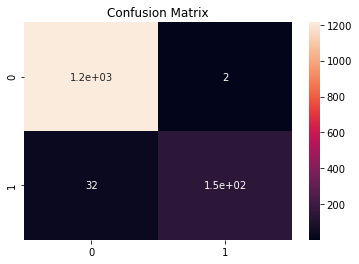

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1215
           1       0.99      0.82      0.90       178

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.9547738693467337


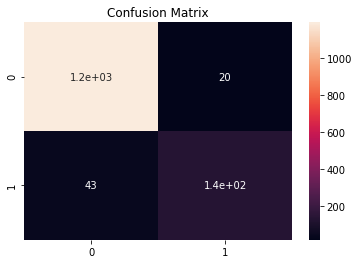

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1215
           1       0.87      0.76      0.81       178

    accuracy                           0.95      1393
   macro avg       0.92      0.87      0.89      1393
weighted avg       0.95      0.95      0.95      1393

######################################## SVC ########################################
Accuracy score for SVC : 0.9698492462311558


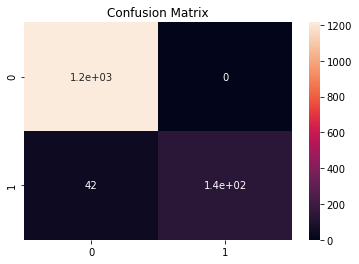

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1215
           1       1.00      0.76      0.87       178

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

######################################## RandomForestClassifier ########################################
Accuracy score for RandomForestClassifier : 0.964824120603015


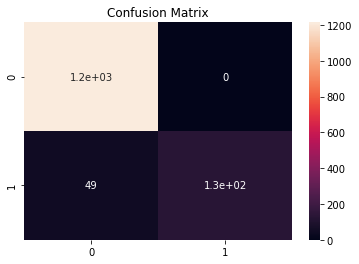

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1215
           1       1.00      0.72      0.84       178

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.97      0.96      0.96      1393

Wall time: 6min 53s


In [32]:
%%time
acc = {"algo":[],"accuracy_score":[]}
for algo, name in models.items():
    print('#'*40, name, '#'*40)
    fit = algo.fit(m_train,l_train)
    pred = fit.predict(m_test)
    performance(algo, name, m_test, l_test, pred)
    acc["algo"].append(name)
    acc["accuracy_score"].append(accuracy_score(l_test,pred))

## Acceuracy measures of each algo.

In [33]:
acc = pd.DataFrame(acc)
acc

,algo,accuracy_score
0,LogisticRegression,0.975592
1,DecisionTreeClassifier,0.954774
2,SVC,0.969849
3,RandomForestClassifier,0.964824


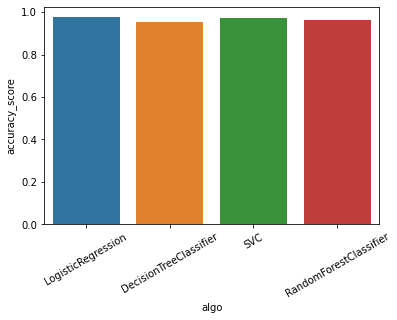

In [34]:
se.barplot(x=acc["algo"],y=acc["accuracy_score"])
mlt.xticks(rotation=30)
mlt.show()

## Accuracy score's of each algo.

## Logistic Regression performing best.